<a href="https://colab.research.google.com/github/Ramyrahmeni/DeepLearning/blob/main/DeepLearningApplicationInNlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Practical Example

In [1]:
import string
class Vectorizer:
  def standardize(self, text):
    text = text.lower()
    return "".join(char for char in text if char not in string.punctuation)
  def tokenize(self, text):
    text = self.standardize(text)
    return text.split()
  def make_vocabulary(self, dataset):
    self.vocabulary = {"": 0, "[UNK]": 1}
    for text in dataset:
      text = self.standardize(text)
      tokens = self.tokenize(text)
      for token in tokens:
        if token not in self.vocabulary:
          self.vocabulary[token] = len(self.vocabulary)
    self.inverse_vocabulary = dict((v, k) for k, v in self.vocabulary.items())
  def encode(self, text):
    text = self.standardize(text)
    tokens = self.tokenize(text)
    return [self.vocabulary.get(token, 1) for token in tokens]
  def decode(self, int_sequence):
    return " ".join(self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

In [2]:
vectorizer = Vectorizer()
dataset = [
 "I write, erase, rewrite",
 "Erase again, and then",
 "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)

In [3]:
test_sentence = "I write, rewrite, and still rewrite again"

In [4]:
vectorizer.encode(test_sentence)

[2, 3, 5, 7, 1, 5, 6]

In [5]:
vectorizer.decode(vectorizer.encode(test_sentence))

'i write rewrite and [UNK] rewrite again'

In [6]:
vectorizer.encode(test_sentence)

[2, 3, 5, 7, 1, 5, 6]

In [7]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(
num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [13]:
x_train.shape

(25000, 20)

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5607 - loss: 0.6862 - val_acc: 0.6934 - val_loss: 0.6255
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7433 - loss: 0.5778 - val_acc: 0.7236 - val_loss: 0.5342
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7802 - loss: 0.4815 - val_acc: 0.7458 - val_loss: 0.5059
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8088 - loss: 0.4295 - val_acc: 0.7484 - val_loss: 0.4977
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8266 - loss: 0.3971 - val_acc: 0.7534 - val_loss: 0.4962
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8384 - loss: 0.3699 - val_acc: 0.7516 - val_loss: 0.4994
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8509 - loss: 0.3515 - val_acc: 0.7538 - val_loss: 0.5047
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8643 - loss: 0.3246 - val_acc: 0.7538 - val_loss: 0.5111
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

# from raw text to word embeddings

In [17]:

import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/aclImdb.zip'
# Specify the directory to unzip to
output_directory = '/content/sample_data/'



# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

print("Unzipping completed.")


Unzipping completed.


In [18]:
import os
imdb_dir = '/content/sample_data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
      if fname[-4:] == '.txt':
        f = open(os.path.join(dir_name, fname))
        texts.append(f.read())
        f.close()
        if label_type == 'neg':
          labels.append(0)
        else:
          labels.append(1)

In [21]:
len(texts)

25000

In [22]:
len(labels)

25000

In [28]:
import tensorflow as tf

In [31]:
max_features = 10000
sequence_length = 100
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)
text_vectorizer.adapt(texts)
vectorized_texts = text_vectorizer(texts)
print("Vectorized Texts:")
print(vectorized_texts.numpy())

Vectorized Texts:
[[1479 5025   74 ...    5 7879   93]
 [ 764  773   44 ...  352 2575  285]
 [  11   18   91 ...    2  165  333]
 ...
 [  10 7206   78 ...    7   12 3539]
 [1420   49    4 ...  604  181   32]
 [  45   23  731 ...    9  717   12]]


In [32]:
print(vectorized_texts)

tf.Tensor(
[[1479 5025   74 ...    5 7879   93]
 [ 764  773   44 ...  352 2575  285]
 [  11   18   91 ...    2  165  333]
 ...
 [  10 7206   78 ...    7   12 3539]
 [1420   49    4 ...  604  181   32]
 [  45   23  731 ...    9  717   12]], shape=(25000, 100), dtype=int64)


In [34]:
import numpy as np
import tensorflow as tf

maxlen = 100
training_samples = 200
validation_samples = 10000

data = vectorized_texts
labels = tf.convert_to_tensor(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = tf.range(tf.shape(data)[0])
indices = tf.random.shuffle(indices)
data = tf.gather(data, indices)
labels = tf.gather(labels, indices)

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [35]:
x_train.shape

TensorShape([200, 100])

In [36]:
y_train.shape

TensorShape([200])

In [37]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-10-13 10:40:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-13 10:40:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-13 10:40:56--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [38]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [53]:
import os
import numpy as np

embeddings_index = {}

glove_file_path = 'glove.6B.100d.txt'
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [54]:
embeddings_index["hello"]

array([ 0.26688  ,  0.39632  ,  0.6169   , -0.77451  , -0.1039   ,
        0.26697  ,  0.2788   ,  0.30992  ,  0.0054685, -0.085256 ,
        0.73602  , -0.098432 ,  0.5479   , -0.030305 ,  0.33479  ,
        0.14094  , -0.0070003,  0.32569  ,  0.22902  ,  0.46557  ,
       -0.19531  ,  0.37491  , -0.7139   , -0.51775  ,  0.77039  ,
        1.0881   , -0.66011  , -0.16234  ,  0.9119   ,  0.21046  ,
        0.047494 ,  1.0019   ,  1.1133   ,  0.70094  , -0.08696  ,
        0.47571  ,  0.1636   , -0.44469  ,  0.4469   , -0.93817  ,
        0.013101 ,  0.085964 , -0.67456  ,  0.49662  , -0.037827 ,
       -0.11038  , -0.28612  ,  0.074606 , -0.31527  , -0.093774 ,
       -0.57069  ,  0.66865  ,  0.45307  , -0.34154  , -0.7166   ,
       -0.75273  ,  0.075212 ,  0.57903  , -0.1191   , -0.11379  ,
       -0.10026  ,  0.71341  , -1.1574   , -0.74026  ,  0.40452  ,
        0.18023  ,  0.21449  ,  0.37638  ,  0.11239  , -0.53639  ,
       -0.025092 ,  0.31886  , -0.25013  , -0.63283  , -0.0118

In [55]:
vocabulary = text_vectorizer.get_vocabulary()

print("Vocabulary Size:", len(vocabulary))
print("First 10 words in vocabulary:", vocabulary[:10])
word_index = {word: index for index, word in enumerate(vocabulary)}

example_word = "example"
print(f"Index of '{example_word}':", word_index.get(example_word, "Not in vocabulary"))

Vocabulary Size: 10000
First 10 words in vocabulary: ['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it']
Index of 'example': 454


In [63]:
# model definition
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Parameters
max_words = 10000  # Size of the vocabulary
embedding_dim = 100  # Dimension of the GloVe embeddings
maxlen = 100  # Length of the input sequences

# Building the model
model = tf.keras.Sequential([
    layers.Embedding(input_dim=max_words,
                     output_dim=embedding_dim,
                     input_length=maxlen,
                     weights=[embedding_matrix],  # Set pre-trained weights
                     trainable=False),  # Freeze the embedding layer
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])


# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [77]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - acc: 0.4690 - loss: 2.0745 - val_acc: 0.5104 - val_loss: 0.7028
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - acc: 0.6708 - loss: 0.5981 - val_acc: 0.5351 - val_loss: 0.7123
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - acc: 0.8633 - loss: 0.4183 - val_acc: 0.5152 - val_loss: 0.7950
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - acc: 0.8203 - loss: 0.4409 - val_acc: 0.5012 - val_loss: 2.0535
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - acc: 0.6445 - loss: 0.8977 - val_acc: 0.5257 - val_loss: 0.9128
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - acc: 0.9791 - loss: 0.1615 - val_acc: 0.5692 - val_loss: 0.7046
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - acc: 1.0000 - loss: 0.0895 - val_acc: 0.5667 - val_loss: 0.7485
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - acc: 1.0000 - loss: 0.0652 - val_acc: 0.5660 - val_loss: 0.7647
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - acc: 0.9475 - loss: 0.

ValueError: The filename must end in `.weights.h5`. Received: filepath=pre_trained_glove_model.h5

In [79]:
model.save_weights('glove.weights.h5')

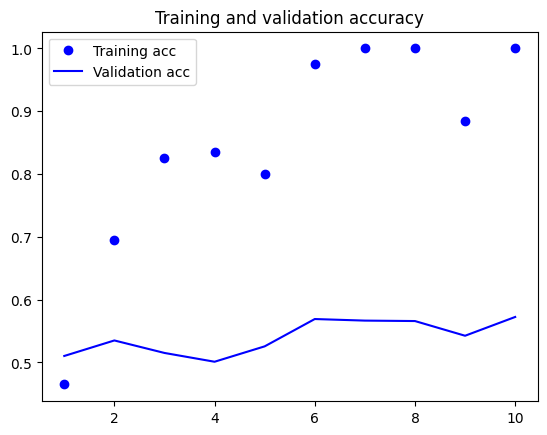

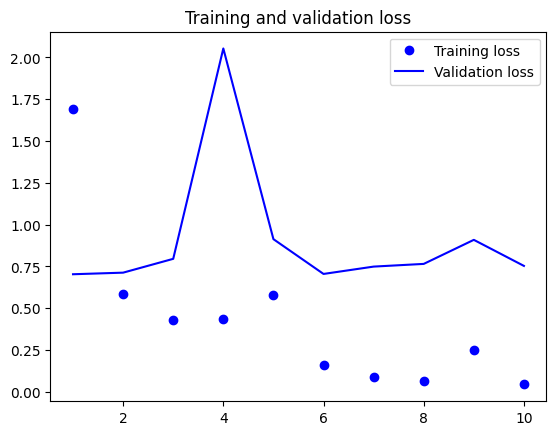

In [80]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [88]:
import os
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


imdb_dir = '/content/sample_data/aclImdb'

# Test directory path
test_dir = os.path.join(imdb_dir, 'test')

# Initialize lists to store texts and labels
labels = []
texts = []

# Loop over the 'neg' and 'pos' folders
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)

    # Read files in the directory
    for fname in sorted(os.listdir(dir_name)):
        if fname.endswith('.txt'):  # Check if the file is a text file
            with open(os.path.join(dir_name, fname), 'r') as f:
                texts.append(f.read())  # Append the file content to texts

            # Append corresponding label (0 for 'neg', 1 for 'pos')
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)




In [95]:
len(texts[0])

900

In [89]:
max_features = 10000
sequence_length = 100
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)
text_vectorizer.adapt(texts)
vectorized_texts = text_vectorizer(texts)
print("Vectorized Texts:")
print(vectorized_texts.numpy())

Vectorized Texts:
[[ 279  174  447 ...  252   55 3527]
 [  11    7   34 ... 2673    4  140]
 [  90    5   32 ...   15   72    3]
 ...
 [  36    2  360 ...  916  128   66]
 [  11   18   16 ...   10  303 3879]
 [ 196  106   11 ...    9  108   63]]


In [90]:
vectorized_texts.shape

TensorShape([25000, 100])

In [101]:
training_samples = 200
validation_samples = 10000

data = vectorized_texts
labels = tf.convert_to_tensor(labels)

x_test=data[10200:]
y_test=labels[10200:]

In [102]:
model.load_weights('glove.weights.h5')
model.evaluate(x_test, y_test)

463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.5051 - loss: 0.8427


[0.9387063980102539, 0.4311486482620239]

In [94]:
x_train.shape

TensorShape([200, 100])

In [98]:
x_test.shape

TensorShape([14800, 100])

In [100]:
print("Shape of x_test:", x_test.shape)  # Should be (num_samples, maxlen)
print("Shape of y_test:", y_test.shape)  # Should be (num_samples,)

Shape of x_test: (14800, 100)
Shape of y_test: (14800, 100)
